In [3]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

from public_tests_a1 import * 

tf.keras.backend.set_floatx('float64')
from assigment_utils import *

tf.autograph.set_verbosity(0)

In [6]:
X, y, centers, classes, std = gen_blobs()

X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.50, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.20, random_state=1)
print("X_train.shape:", X_train.shape, "X_cv.shape:", X_cv.shape, "X_test.shape:", X_test.shape)

X_train.shape: (400, 2) X_cv.shape: (320, 2) X_test.shape: (80, 2)


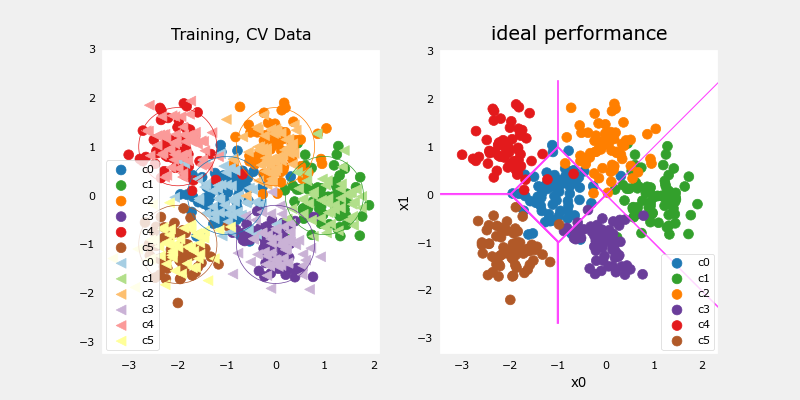

In [7]:
plt_train_eq_dist(X_train, y_train,classes, X_cv, y_cv, centers, std)

In [8]:
def eval_cat_err(y, yhat):
    m = len(y)
    incorrect = 0
    for i in range(m):
        if yhat[i] != y[i]:
            incorrect += 1
    cerr = incorrect / m
    return cerr

y_hat = np.array([1, 2, 0])
y_tmp = np.array([1, 2, 3])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.333" )
y_hat = np.array([[1], [2], [0], [3]])
y_tmp = np.array([[1], [2], [1], [3]])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.250" )

# BEGIN UNIT TEST  
test_eval_cat_err(eval_cat_err)
# END UNIT TEST
# BEGIN UNIT TEST  
test_eval_cat_err(eval_cat_err)

categorization error 0.333, expected:0.333
categorization error 0.250, expected:0.250
 All tests passed.
 All tests passed.


In [10]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

tf.random.set_seed(1234)
model = Sequential(
    [
        ### START CODE HERE ### 
        tf.keras.layers.Dense(120, activation="relu"),
        tf.keras.layers.Dense(40, activation="relu"),
        tf.keras.layers.Dense(6, activation="linear")
        ### END CODE HERE ### 
    ], name="Complex"
)
model.compile(
    ### START CODE HERE ### 
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    ### END CODE HERE ### 
)

In [11]:
# BEGIN UNIT TEST
model.fit(
    X_train, y_train,
    epochs=100
)

Epoch 1/100
13/13 [==============================] - 0s 683us/step - loss: 1.7073
Epoch 2/100
13/13 [==============================] - 0s 464us/step - loss: 1.4871
Epoch 3/100
13/13 [==============================] - 0s 363us/step - loss: 1.3068
Epoch 4/100
13/13 [==============================] - 0s 396us/step - loss: 1.1294
Epoch 5/100
13/13 [==============================] - 0s 398us/step - loss: 0.9596
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7902
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6524
Epoch 8/100
13/13 [==============================] - 0s 460us/step - loss: 0.5445
Epoch 9/100
13/13 [==============================] - 0s 431us/step - loss: 0.4701
Epoch 10/100
13/13 [==============================] - 0s 389us/step - loss: 0.4181
Epoch 11/100
13/13 [==============================] - 0s 457us/step - loss: 0.3831
Epoch 12/100
13/13 [==============================] - 0s 417us/step - loss: 0.3591
Epoch 13/100
13/1

In [14]:
model.summary()


Model: "Complex"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 120)               360       
                                                                 
 dense_4 (Dense)             (None, 40)                4840      
                                                                 
 dense_5 (Dense)             (None, 6)                 246       
                                                                 
Total params: 5446 (42.55 KB)
Trainable params: 5446 (42.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1082/1082 [==============================] - 0s 200us/step


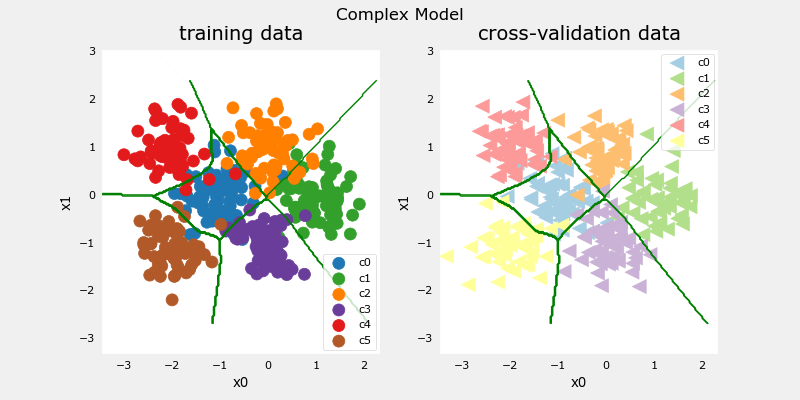

In [15]:
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict,X_train,y_train, classes, X_cv, y_cv, suptitle="Complex Model")

In [16]:
training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex model: {cv_cerr_complex:0.3f}")

10/10 [==============================] - 0s 352us/step
categorization error, training, complex model: 0.070
categorization error, cv,       complex model: 0.062


Exercise 4

In [17]:
# UNQ_C4
# GRADED CELL: model_s

tf.random.set_seed(1234)
model_s = Sequential(
    [
        ### START CODE HERE ### 
        tf.keras.layers.Dense(6, activation="relu"),
        tf.keras.layers.Dense(6, activation="linear")
        ### END CODE HERE ### 
    ], name = "Simple"
)
model_s.compile(
    ### START CODE HERE ### 
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    ### START CODE HERE ### 
)

In [22]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

# BEGIN UNIT TEST
model_s.fit(
    X_train,y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4018
Epoch 2/1000
13/13 [==============================] - 0s 905us/step - loss: 0.3988
Epoch 3/1000
13/13 [==============================] - 0s 329us/step - loss: 0.3963
Epoch 4/1000
13/13 [==============================] - 0s 314us/step - loss: 0.3936
Epoch 5/1000
13/13 [==============================] - 0s 328us/step - loss: 0.3910
Epoch 6/1000
13/13 [==============================] - 0s 393us/step - loss: 0.3884
Epoch 7/1000
13/13 [==============================] - 0s 323us/step - loss: 0.3861
Epoch 8/1000
13/13 [==============================] - 0s 289us/step - loss: 0.3836
Epoch 9/1000
13/13 [==============================] - 0s 346us/step - loss: 0.3812
Epoch 10/1000
13/13 [==============================] - 0s 308us/step - loss: 0.3789
Epoch 11/1000
13/13 [==============================] - 0s 297us/step - loss: 0.3766
Epoch 12/1000
13/13 [==============================] - 0s 365us/step - loss: 0.3746
Epo

In [23]:
# BEGIN UNIT TEST
model_s.summary()


Model: "Simple"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 6)                 18        
                                                                 
 dense_7 (Dense)             (None, 6)                 42        
                                                                 
Total params: 60 (480.00 Byte)
Trainable params: 60 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1082/1082 [==============================] - 0s 180us/step


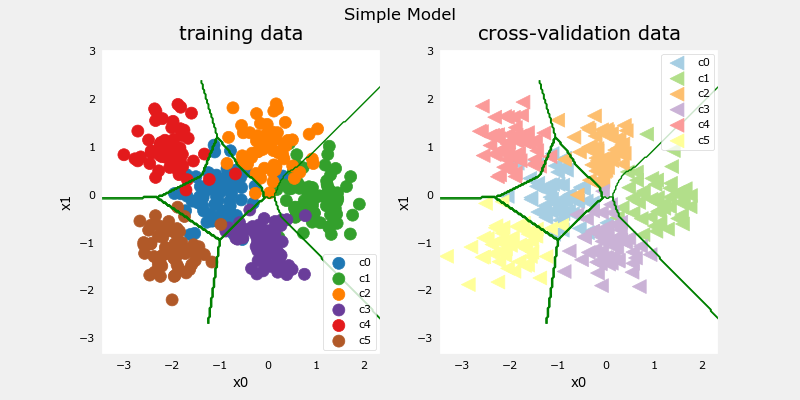

In [24]:
#make a model for plotting routines to call
model_predict_s = lambda Xl: np.argmax(tf.nn.softmax(model_s.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict_s,X_train,y_train, classes, X_cv, y_cv, suptitle="Simple Model")

In [25]:
training_cerr_simple = eval_cat_err(y_train, model_predict_s(X_train))
cv_cerr_simple = eval_cat_err(y_cv, model_predict_s(X_cv))
print(f"categorization error, training, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

10/10 [==============================] - 0s 857us/step
categorization error, training, simple model, 0.075, complex model: 0.070
categorization error, cv,       simple model, 0.059, complex model: 0.062


Regularization

In [27]:
# UNQ_C5
# GRADED CELL: model_r

tf.random.set_seed(1234)
model_r = Sequential(
    [
        ### START CODE HERE ### 
        tf.keras.layers.Dense(120, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        tf.keras.layers.Dense(40, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        tf.keras.layers.Dense(6, activation="linear")
        ### START CODE HERE ### 
    ], name= None
)
model_r.compile(
    ### START CODE HERE ### 
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    ### START CODE HERE ### 
)

In [30]:
# BEGIN UNIT TEST
model_r.fit(
    X_train, y_train,
    epochs=1000
)

Epoch 1/1000
13/13 [==============================] - 0s 639us/step - loss: 7.5756
Epoch 2/1000
13/13 [==============================] - 0s 462us/step - loss: 6.4154
Epoch 3/1000
13/13 [==============================] - 0s 450us/step - loss: 5.4583
Epoch 4/1000
13/13 [==============================] - 0s 442us/step - loss: 4.6657
Epoch 5/1000
13/13 [==============================] - 0s 488us/step - loss: 4.0178
Epoch 6/1000
13/13 [==============================] - 0s 477us/step - loss: 3.4863
Epoch 7/1000
13/13 [==============================] - 0s 419us/step - loss: 3.0587
Epoch 8/1000
13/13 [==============================] - 0s 468us/step - loss: 2.7083
Epoch 9/1000
13/13 [==============================] - 0s 435us/step - loss: 2.4198
Epoch 10/1000
13/13 [==============================] - 0s 511us/step - loss: 2.1813
Epoch 11/1000
13/13 [==============================] - 0s 456us/step - loss: 1.9862
Epoch 12/1000
13/13 [==============================] - 0s 483us/step - loss: 1.8264
E

In [31]:
# BEGIN UNIT TEST
model_r.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 120)               360       
                                                                 
 dense_12 (Dense)            (None, 40)                4840      
                                                                 
 dense_13 (Dense)            (None, 6)                 246       
                                                                 
Total params: 5446 (42.55 KB)
Trainable params: 5446 (42.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1082/1082 [==============================] - 0s 205us/step


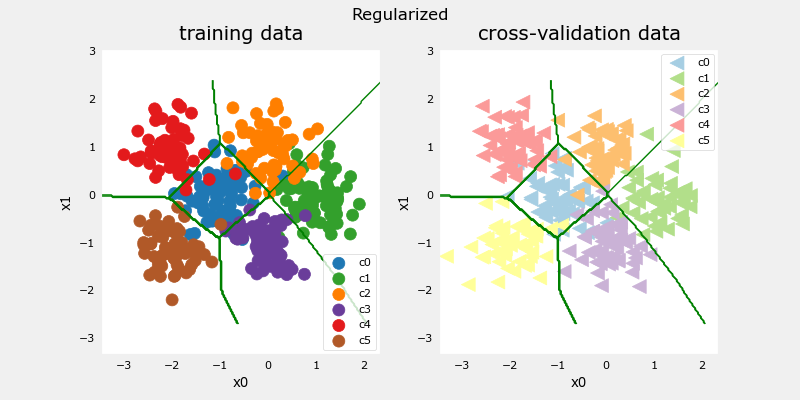

In [32]:

model_predict_r = lambda Xl: np.argmax(tf.nn.softmax(model_r.predict(Xl)).numpy(),axis=1)
 
plt_nn(model_predict_r, X_train,y_train, classes, X_cv, y_cv, suptitle="Regularized")

In [33]:
training_cerr_reg = eval_cat_err(y_train, model_predict_r(X_train))
cv_cerr_reg = eval_cat_err(y_cv, model_predict_r(X_cv))
test_cerr_reg = eval_cat_err(y_test, model_predict_r(X_test))
print(f"categorization error, training, regularized: {training_cerr_reg:0.3f}, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       regularized: {cv_cerr_reg:0.3f}, simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

3/3 [==============================] - 0s 568us/step
categorization error, training, regularized: 0.068, simple model, 0.075, complex model: 0.070
categorization error, cv,       regularized: 0.066, simple model, 0.059, complex model: 0.062


In [34]:
tf.random.set_seed(1234)
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(classes, activation = 'linear')
        ]
    )
    models[i].compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.01),
    )

    models[i].fit(
        X_train,y_train,
        epochs=1000
    )
    print(f"Finished lambda = {lambda_}")

Epoch 1/1000
13/13 [==============================] - 0s 574us/step - loss: 1.0246
Epoch 2/1000
13/13 [==============================] - 0s 459us/step - loss: 0.3824
Epoch 3/1000
13/13 [==============================] - 0s 409us/step - loss: 0.3088
Epoch 4/1000
13/13 [==============================] - 0s 406us/step - loss: 0.2634
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2523
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2806
Epoch 7/1000
13/13 [==============================] - 0s 388us/step - loss: 0.2397
Epoch 8/1000
13/13 [==============================] - 0s 439us/step - loss: 0.2230
Epoch 9/1000
13/13 [==============================] - 0s 431us/step - loss: 0.2311
Epoch 10/1000
13/13 [==============================] - 0s 697us/step - loss: 0.1981
Epoch 11/1000
13/13 [==============================] - 0s 405us/step - loss: 0.2190
Epoch 12/1000
13/13 [==============================] - 0s 505us/step - loss: 0.2044
Epoch

Epoch 1/1000
13/13 [==============================] - 0s 531us/step - loss: 1.1711
Epoch 2/1000
13/13 [==============================] - 0s 425us/step - loss: 0.4751
Epoch 3/1000
13/13 [==============================] - 0s 404us/step - loss: 0.3808
Epoch 4/1000
13/13 [==============================] - 0s 453us/step - loss: 0.3508
Epoch 5/1000
13/13 [==============================] - 0s 410us/step - loss: 0.3440
Epoch 6/1000
13/13 [==============================] - 0s 393us/step - loss: 0.3646
Epoch 7/1000
13/13 [==============================] - 0s 415us/step - loss: 0.3169
Epoch 8/1000
13/13 [==============================] - 0s 436us/step - loss: 0.2954
Epoch 9/1000
13/13 [==============================] - 0s 417us/step - loss: 0.2874
Epoch 10/1000
13/13 [==============================] - 0s 498us/step - loss: 0.2706
Epoch 11/1000
13/13 [==============================] - 0s 430us/step - loss: 0.2733
Epoch 12/1000
13/13 [==============================] - 0s 431us/step - loss: 0.2710
E

Epoch 1/1000
13/13 [==============================] - 0s 492us/step - loss: 1.5552
Epoch 2/1000
13/13 [==============================] - 0s 496us/step - loss: 0.7994
Epoch 3/1000
13/13 [==============================] - 0s 420us/step - loss: 0.6383
Epoch 4/1000
13/13 [==============================] - 0s 420us/step - loss: 0.5518
Epoch 5/1000
13/13 [==============================] - 0s 397us/step - loss: 0.5233
Epoch 6/1000
13/13 [==============================] - 0s 441us/step - loss: 0.4947
Epoch 7/1000
13/13 [==============================] - 0s 431us/step - loss: 0.4965
Epoch 8/1000
13/13 [==============================] - 0s 441us/step - loss: 0.4835
Epoch 9/1000
13/13 [==============================] - 0s 431us/step - loss: 0.4467
Epoch 10/1000
13/13 [==============================] - 0s 442us/step - loss: 0.4207
Epoch 11/1000
13/13 [==============================] - 0s 445us/step - loss: 0.4213
Epoch 12/1000
13/13 [==============================] - 0s 488us/step - loss: 0.4223
E

Epoch 1/1000
13/13 [==============================] - 0s 526us/step - loss: 2.9763
Epoch 2/1000
13/13 [==============================] - 0s 450us/step - loss: 1.2465
Epoch 3/1000
13/13 [==============================] - 0s 425us/step - loss: 0.9687
Epoch 4/1000
13/13 [==============================] - 0s 451us/step - loss: 0.8453
Epoch 5/1000
13/13 [==============================] - 0s 416us/step - loss: 0.7857
Epoch 6/1000
13/13 [==============================] - 0s 441us/step - loss: 0.7246
Epoch 7/1000
13/13 [==============================] - 0s 452us/step - loss: 0.7366
Epoch 8/1000
13/13 [==============================] - 0s 492us/step - loss: 0.6814
Epoch 9/1000
13/13 [==============================] - 0s 453us/step - loss: 0.6250
Epoch 10/1000
13/13 [==============================] - 0s 457us/step - loss: 0.5965
Epoch 11/1000
13/13 [==============================] - 0s 512us/step - loss: 0.5920
Epoch 12/1000
13/13 [==============================] - 0s 459us/step - loss: 0.6035
E

Finished lambda = 0.05
Epoch 1/1000
13/13 [==============================] - 0s 551us/step - loss: 4.4726
Epoch 2/1000
13/13 [==============================] - 0s 475us/step - loss: 1.6402
Epoch 3/1000
13/13 [==============================] - 0s 411us/step - loss: 1.2988
Epoch 4/1000
13/13 [==============================] - 0s 408us/step - loss: 1.0565
Epoch 5/1000
13/13 [==============================] - 0s 444us/step - loss: 0.9723
Epoch 6/1000
13/13 [==============================] - 0s 735us/step - loss: 0.9465
Epoch 7/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.9372
Epoch 8/1000
13/13 [==============================] - 0s 828us/step - loss: 0.8766
Epoch 9/1000
13/13 [==============================] - 0s 482us/step - loss: 0.7989
Epoch 10/1000
13/13 [==============================] - 0s 435us/step - loss: 0.7592
Epoch 11/1000
13/13 [==============================] - 0s 431us/step - loss: 0.7511
Epoch 12/1000
13/13 [==============================] - 0s 479us/

Finished lambda = 0.1
Epoch 1/1000
13/13 [==============================] - 0s 473us/step - loss: 7.1642
Epoch 2/1000
13/13 [==============================] - 0s 446us/step - loss: 2.0052
Epoch 3/1000
13/13 [==============================] - 0s 416us/step - loss: 1.7391
Epoch 4/1000
13/13 [==============================] - 0s 442us/step - loss: 1.4820
Epoch 5/1000
13/13 [==============================] - 0s 411us/step - loss: 1.3870
Epoch 6/1000
13/13 [==============================] - 0s 391us/step - loss: 1.3415
Epoch 7/1000
13/13 [==============================] - 0s 407us/step - loss: 1.2487
Epoch 8/1000
13/13 [==============================] - 0s 483us/step - loss: 1.1701
Epoch 9/1000
13/13 [==============================] - 0s 451us/step - loss: 1.0958
Epoch 10/1000
13/13 [==============================] - 0s 441us/step - loss: 1.0760
Epoch 11/1000
13/13 [==============================] - 0s 440us/step - loss: 1.0050
Epoch 12/1000
13/13 [==============================] - 0s 443us

Finished lambda = 0.2
Epoch 1/1000
13/13 [==============================] - 0s 511us/step - loss: 9.8820
Epoch 2/1000
13/13 [==============================] - 0s 491us/step - loss: 2.2993
Epoch 3/1000
13/13 [==============================] - 0s 428us/step - loss: 2.0381
Epoch 4/1000
13/13 [==============================] - 0s 406us/step - loss: 1.6668
Epoch 5/1000
13/13 [==============================] - 0s 459us/step - loss: 1.5453
Epoch 6/1000
13/13 [==============================] - 0s 416us/step - loss: 1.4951
Epoch 7/1000
13/13 [==============================] - 0s 400us/step - loss: 1.3736
Epoch 8/1000
13/13 [==============================] - 0s 515us/step - loss: 1.3069
Epoch 9/1000
13/13 [==============================] - 0s 436us/step - loss: 1.2430
Epoch 10/1000
13/13 [==============================] - 0s 547us/step - loss: 1.2217
Epoch 11/1000
13/13 [==============================] - 0s 449us/step - loss: 1.1767
Epoch 12/1000
13/13 [==============================] - 0s 445us

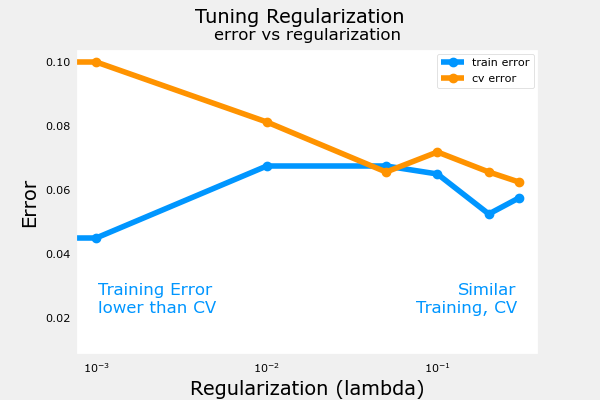

In [35]:
plot_iterate(lambdas, models, X_train, y_train, X_cv, y_cv)

3/3 [==============================] - 0s 613us/step


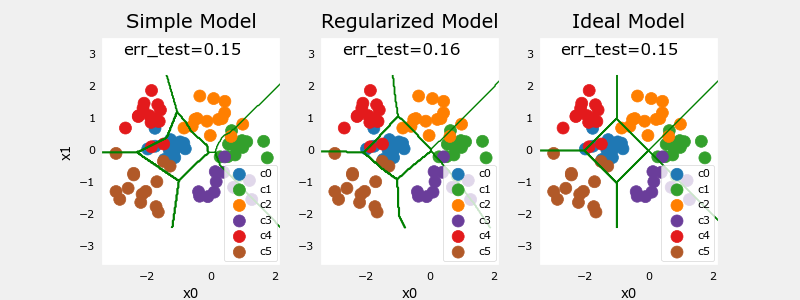

In [36]:
plt_compare(X_test,y_test, classes, model_predict_s, model_predict_r, centers)